# Text-to-Image Diffusion model이란?

- 랜덤 노이즈로부터 노이즈를 조금씩 제거하면서 이미지를 생성하는 생성 모델입니다.
- 시작 노이즈가 달라지면(seed) 다른 이미지를 생성합니다.
- 입력 텍스트에 따르는 이미지를 생성합니다.
- 대표적인 Text-to-Image Diffusion model : DALL-E, Stable Diffusion, Imagen 등


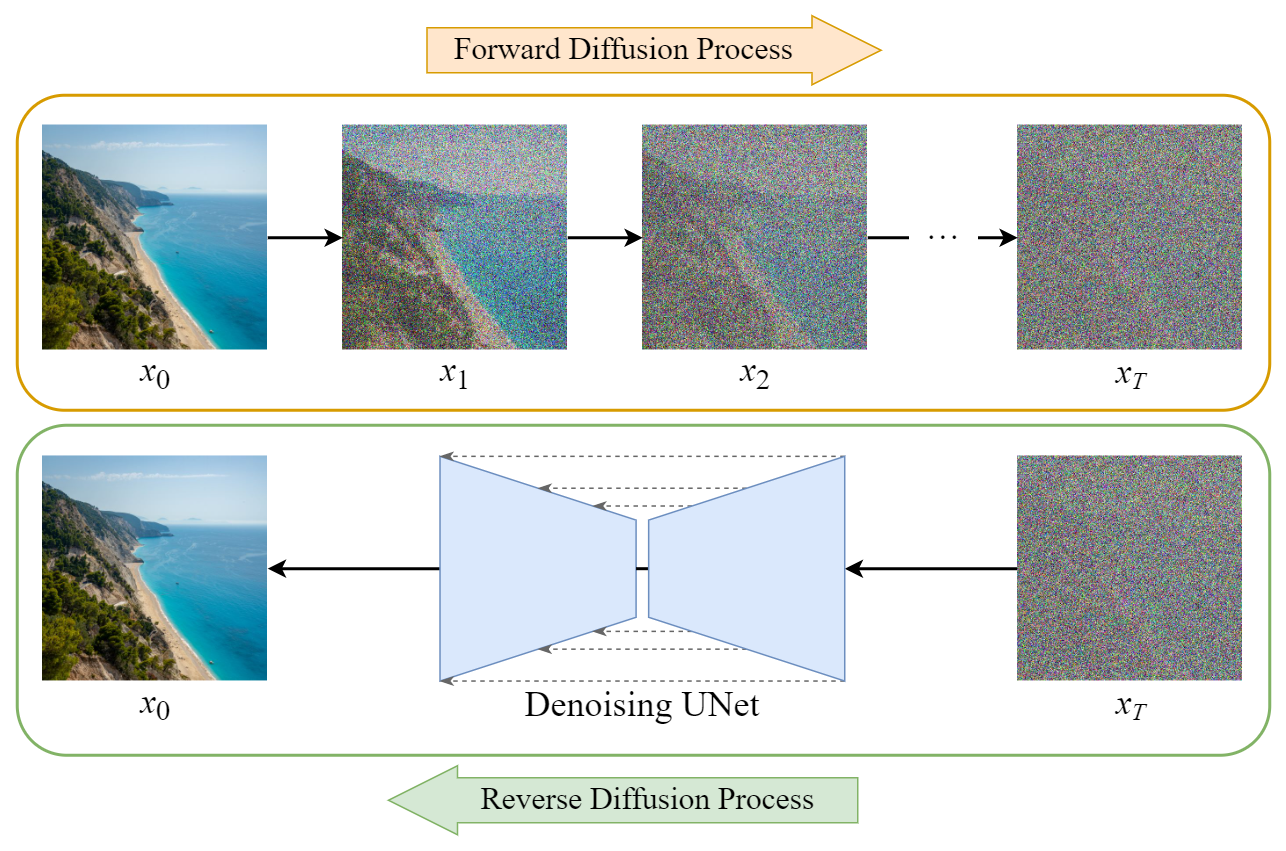

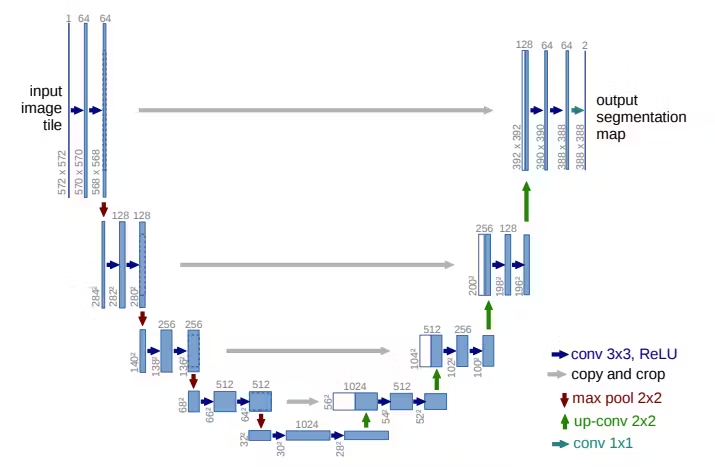

### 디퓨전 모델의 forward process, reverse process
- forward process : 학습 이미지에 잡음(노이즈)를 첨가하는 과정
- reverse process : 노이즈로부터 원래 학습 이미지를 복원하는 과정

- 추론 시 : 무작위 노이즈로부터 reverse process를 통해 이미지를 생성

# OpenAI DALL-E 2를 이용하여 이미지 생성하기

In [ ]:
%pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


## api_key 발급 받는법
1. https://openai.com/product 사이트로 접근 & 회원가입
2. 로그인 후 'API' 선택
3. 우측상단의 personal을 누른 뒤 View API keys 선택
4. create new secret key 사용
5. 'Billing hard limit has been reached' 라는 에러가 나올텐데, DALL-E API를 사용하는 경우 일정 금액을 충전해야 사용가능해짐
6. 다시 personal로 가서 Billing -> overview에 가서 충전
7. API key를 발급받은 후 api_key를 발급 받아 입력

In [2]:
import openai
from PIL import Image
import requests
from io import BytesIO

# api_key를 개인별로 발급받아 입력합니다.
openai.api_key = '...'

'''
1. prompt : 이미지에 대한 설명을 prompt에 입력합니다.
2. n : 한 번에 생성할 이미지의 개수를 설정합니다.
3. size : 이미지의 해상도를 결정합니다.
'''

response = openai.Image.create(
    prompt='a white siamese cat',
    n=2,
    size="512x512"
)
image_url = response['data'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

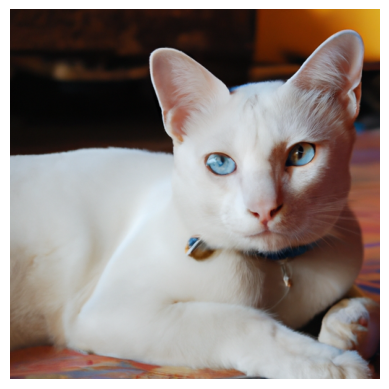

In [3]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(img)
plt.show()

# Stable Diffusion을 이용하여 이미지 생성하기

## Diffusers 사용법 익히기

- diffusers란?
    - diffusion model을 쉽게 사용하기 위한 통합 라이브러리
    - pipe라는 구조로 high-level에서 쉽게 이미지를 생성할 수도, 내부 구조를 수정하여 customize도 가능
    - 다루기 쉽고 새로운 모델도 계속 추가되는 중

### Huggingface로부터 token 받아오기

- Huggingface 홈페이지 가입 후 settings-Access tokens에서 READ 용으로 token 발급받기

In [ ]:
%pip install huggingface_hub
%pip install diffusers
%pip install transformers
%pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
# diffusers에서 stable diffusion model을 사용하기 위해 token을 받아옵니다.
from huggingface_hub import login

login()

In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

# diffusion model의 이미지 생성 과정이 pipe 안에서 전부 이루어집니다.
# 이번 실습에서는 stable diffusion 1.5를 사용
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

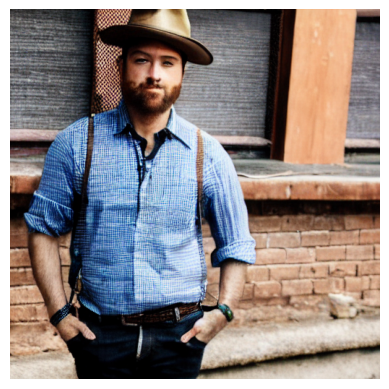

In [ ]:
prompt = "a man waring fedora"

# prompt : 이미지 생성 시 어떠한 이미지를 만들 지 문장으로 설명
# guidance scale : prompt가 주어졌을 때 이미지가 prompt를 얼마나 따를지를 결정합니다. 일반적으로 5~15 사이 사용
image = pipe(prompt, guidance_scale=7.5).images[0]
plt.axis('off')
plt.imshow(image)
plt.show()

### 시드값을 고정하여 같은 이미지 생성하기

  0%|          | 0/50 [00:00<?, ?it/s]

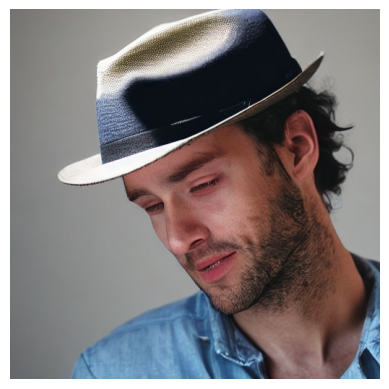

In [ ]:
prompt = "a man wearing fedora"
# generator를 사용하여 시드값 설정 : 1024
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

plt.axis('off')
plt.imshow(image)
plt.show()

# ControlNet을 사용하여 이미지 만들기
## ControlNet이란??
- 디퓨전 모델에 condition을 여러 개 넣어(text + scribble, canny, depth, normal, pose 등...) 조건부 이미지를 생성하는 모델
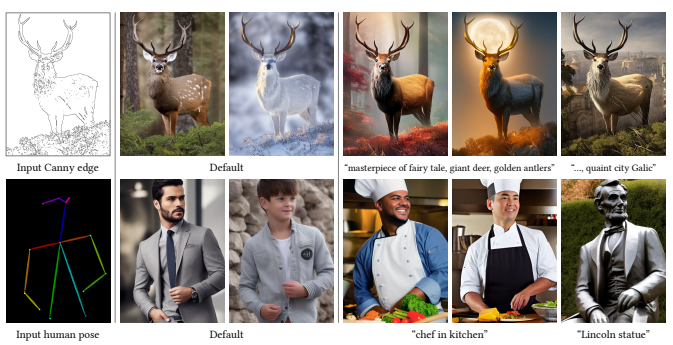

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

torch.cuda.empty_cache()

# diffusers에서 controlnet 모델을 불러옵니다.
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-scribble", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
from PIL import Image

# 고양이 스케치 사진을 불러옵니다.
scribble_image = Image.open('./scribble_cat.png')

In [ ]:
prompt = "a white siamese cat"

# pipeline에는 prompt, 스케치 이미지를 입력합니다.

output = pipe(
    prompt,
    scribble_image,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

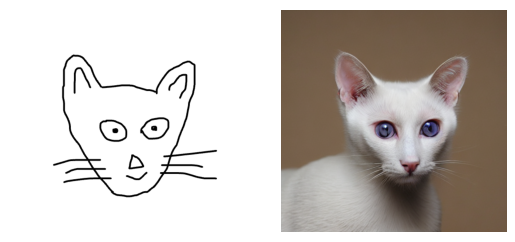

In [ ]:
# 스케치 이미지와 생성 결과물을 plot합니다.

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(scribble_image)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(output)
plt.show()

# Image Inpainting
- 마스크를 활용하여 조건부 이미지 생성하기

In [6]:
import torch
from diffusers import StableDiffusionInpaintPipeline
import PIL
import requests
from io import BytesIO

torch.cuda.empty_cache()

# inpainting pipeline 불러오기
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [7]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


# url로부터 예시 이미지를 다운로드하고 512 x 512 크기로 맞추기
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [9]:
prompt = "Face of a yellow cat, high resolution, sitting on a park bench"

# 파이프라인에는 프롬프트, 원본 이미지, 마스크 이미지를 입력합니다.
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

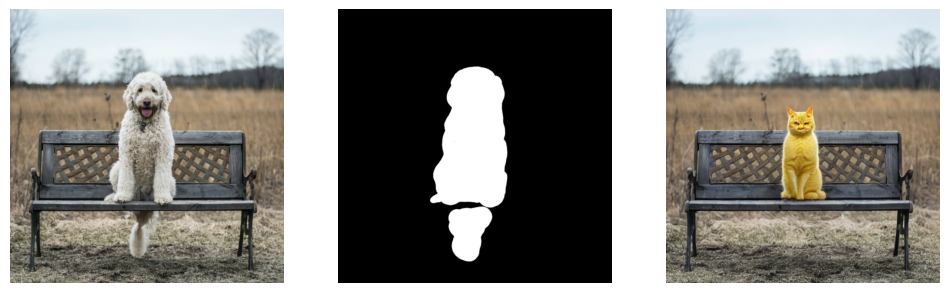

In [12]:
import matplotlib.pyplot as plt

# 실행 결과를 plot
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(init_image)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(mask_image)
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(image)
plt.show()

# Personalization : 자신만의 Diffusion Model 만들기
- Personalization : 개인이 소유한 사진을 디퓨전 모델에 넣어서 사용할 수는 없을까?
## Dreambooth
- 하나의 객체에 대한 3-5 장 정도의 이미지로 디퓨전 모델을 파인튜닝
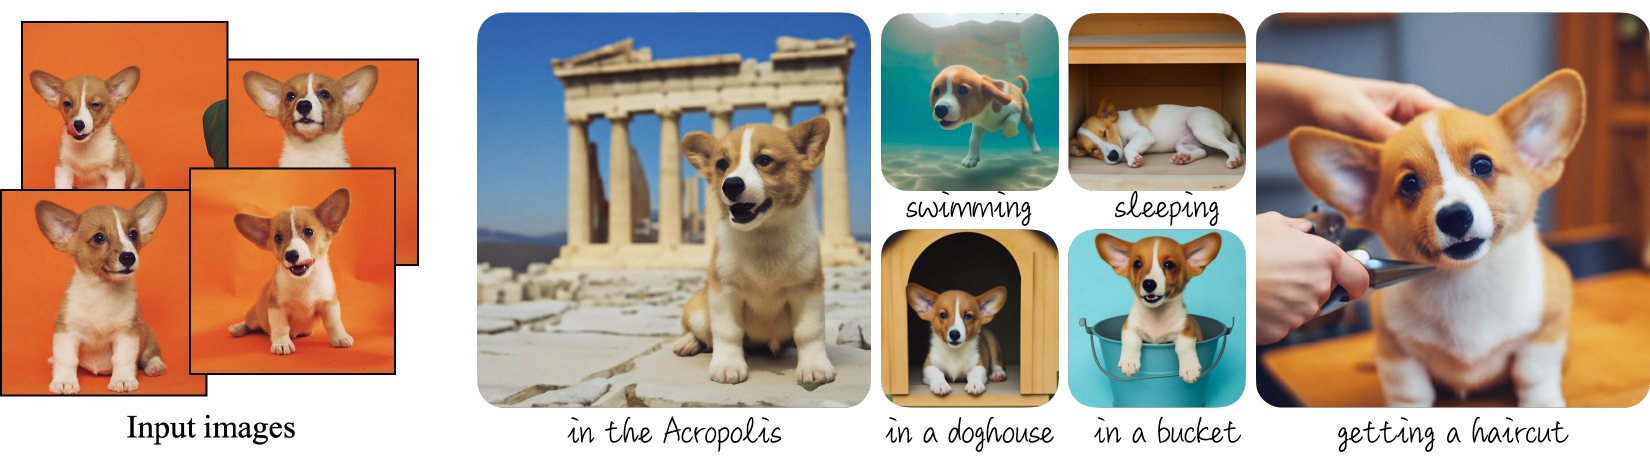

## Textual Inversion
- 하나의 객체에 대한 이미지를 입력하여 디퓨전 모델만이 이해할 수 있는 특별한 단어를 학습
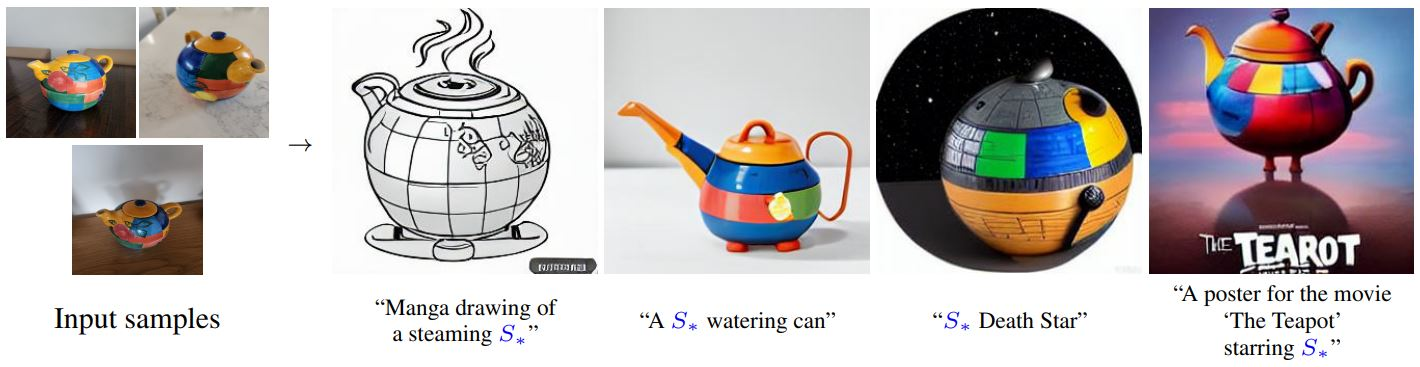

# 과제
1. manual seed(1024)를 이용하여 seed를 고정한 상태에서 negative prompt를 사용하여 수염이 없는 남자 사진을 만들기
- 사진을 생성할 때, 내가 원하지 않는 부분을 제외하고 만들고 싶다면?
- (positive) prompt, negative prompt를 이용하여 만드는 사진에 넣고 싶은 요소와 빼고 싶은 요소를 디퓨전 모델에 입력
- diffusers pipeline github https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py 참조
- prompt는 "a man wearing fedora"를 사용
- 전후 이미지 관계(수염이 있다가 사라진 상태)가 명확히 보여야 함

2. 주어진 pose 사진을 사용하여 ControlNet으로 사진 생성하기
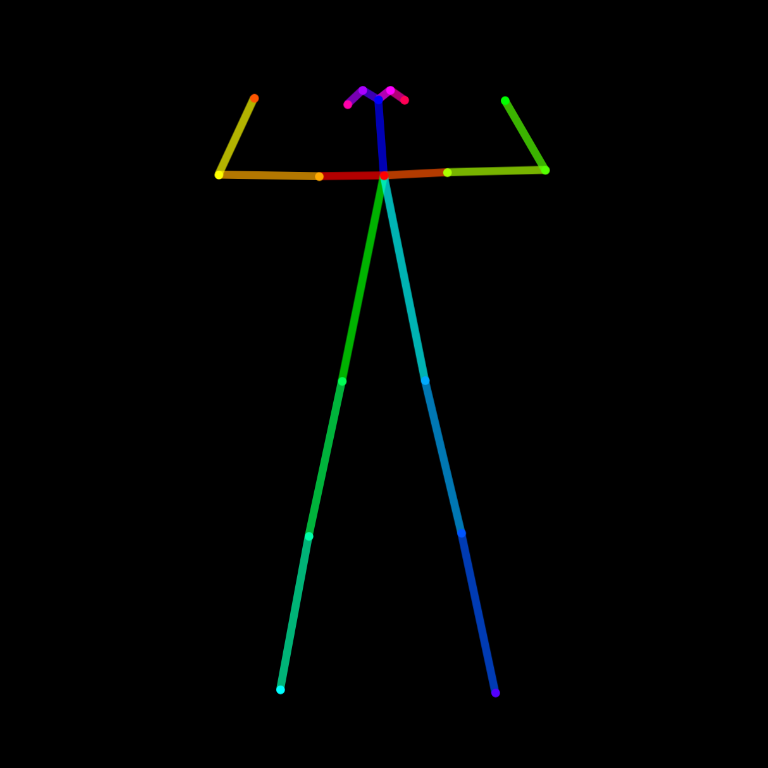
3. 주어진 사진을 사용하여 inpainting 수행하기
- 사진은 가상대학에 업로드된 것을 사용
- mask는 https://huggingface.co/spaces/r3gm/inpaint-mask-maker에서 마스크를 직접 생성
- prompt는 자유롭게 사용
- 이미지와 mask, 생성 결과를 plot